In [5]:
#Load the Drive helper and mount
from google.colab import drive

#This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**In order to run the code set "path" to the directory just above the .csv file**


In [0]:
#importing neceassary libraries
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import pickle
%matplotlib inline
path = 'drive/My Drive/data_analytics/'
    


# Label Encoding and Preprocessing of Data

In [0]:
#loading the dataset
data = pd.read_csv(path + 'License.csv')

In [0]:
#copying original dataset in data1
data1=data[:]

In [9]:
#splitting location into two separate columns (longitude and latitude)
combined= data1['Location'].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
data1['Latitude']= combined['Latitude']
data1['Longitude']= combined['Longitude']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#converting to float type
data1['Latitude'] = data1['Latitude'].apply(pd.to_numeric, errors='coerce')
data1['Longitude'] = data1['Longitude'].apply(pd.to_numeric, errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
#normnalizing the columns containing longitude, latitude and estimated cost 
data1['Longitude']=(data1['Longitude']- data1['Longitude'].min())/( data1['Longitude'].max()- data1['Longitude'].min())
data1['Latitude']=(data1['Latitude']- data1['Latitude'].min())/( data1['Latitude'].max()- data1['Latitude'].min())
data1['Estimated Cost']= (data1['Estimated Cost']- data1['Estimated Cost'].min())/( data1['Estimated Cost'].max()- data1['Estimated Cost'].min())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [100]:
# converting categorical strings to label encoded data
cat = data1['Neighborhoods - Analysis Boundaries'].tolist()
encoded_data, mapping_index = pd.Series(cat).factorize()
print(type(encoded_data))
data1['Encoding Neighborhood']= pd.DataFrame(encoded_data)

cat = data1['Existing Use'].tolist()
encoded_data, mapping_index = pd.Series(cat).factorize()
print(type(encoded_data))

cat = data1['Proposed Use'].tolist()
encoded_data, mapping_index = pd.Series(cat).factorize()
print(type(encoded_data))
data1['Encoded Proposed Use']= pd.DataFrame(encoded_data)

z = {'approved':1, 'issued':1, 'complete':1, 'expired':1, 'revoked': 0, 'disapproved':0, 'cancelled': 0}
x = data1['Current Status']
output = x.map(z)

data1['Output']= pd.DataFrame(output)

data1['Encoded Existing Use'] = data1['Encoded Existing Use'].replace(-1, np.nan)
data1['Encoded Proposed Use'] = data1['Encoded Proposed Use'].replace(-1, np.nan)
data1['Encoding Neighborhood'] = data1['Encoding Neighborhood'].replace(-1, np.nan)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


<class 'numpy.ndarray'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [0]:
# removing redundant columns and copying it to data2 Dataframe
data2 = data1.drop(['Block', 'Lot','Permit Type Definition','Permit Number','Record ID','Street Number', 'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit Suffix', 'Location', 'Neighborhoods - Analysis Boundaries', 'Current Status', 'Existing Use','Proposed Use'], axis=1)

In [102]:
# Take a look at data2 
data2.head()

,Permit Type,Permit Creation Date,Unit,Filed Date,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,Supervisor District,Zipcode,Latitude,Longitude,Encoding Neighborhood,Encoded Existing Use,Encoded Proposed Use,Output
0,4,05/06/2015,NaN,05/06/2015,6.0,NaN,0.000007,143.0,NaN,3.0,94102.0,0.673289,0.705894,0.0,0.0,NaN,1
1,4,04/19/2016,0.0,04/19/2016,7.0,NaN,0.000000,NaN,NaN,3.0,94102.0,0.687359,0.691359,0.0,0.0,NaN,1
2,8,11/07/2016,0.0,11/07/2016,2.0,2.0,0.000004,1.0,1.0,3.0,94109.0,0.762188,0.657296,1.0,1.0,0.0,1
3,6,11/28/2016,NaN,11/28/2016,3.0,NaN,0.000186,NaN,NaN,6.0,94102.0,0.651006,0.699100,0.0,2.0,NaN,1
4,8,06/14/2017,NaN,06/14/2017,5.0,5.0,0.000007,326.0,326.0,10.0,94107.0,0.443251,0.821820,2.0,3.0,1.0,1


In [103]:
# Segregating Month-Day-year
from datetime import datetime
 
year = lambda x: datetime.strptime(x, "%m/%d/%Y" ).year
data2['Permit_year'] = data2['Permit Creation Date'].map(year)


month = lambda x: datetime.strptime(x, "%m/%d/%Y" ).month
data2['Permit_month'] = data2['Permit Creation Date'].map(month)


day = lambda x: datetime.strptime(x, "%m/%d/%Y" ).day
data2['Permit_day'] = data2['Permit Creation Date'].map(day)


year_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).year
data2['Filed_year'] = data2['Filed Date'].map(year_1)


month_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).month
data2['Filed_month'] = data2['Filed Date'].map(month_1)


day_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).day
data2['Filed_day'] = data2['Filed Date'].map(day_1)

data2.drop('Filed Date', axis =1, inplace = True)
data2.drop('Permit Creation Date', axis =1, inplace = True)

data2.head()


,Permit Type,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,Supervisor District,Zipcode,Latitude,...,Encoding Neighborhood,Encoded Existing Use,Encoded Proposed Use,Output,Permit_year,Permit_month,Permit_day,Filed_year,Filed_month,Filed_day
0,4,NaN,6.0,NaN,0.000007,143.0,NaN,3.0,94102.0,0.673289,...,0.0,0.0,NaN,1,2015,5,6,2015,5,6
1,4,0.0,7.0,NaN,0.000000,NaN,NaN,3.0,94102.0,0.687359,...,0.0,0.0,NaN,1,2016,4,19,2016,4,19
2,8,0.0,2.0,2.0,0.000004,1.0,1.0,3.0,94109.0,0.762188,...,1.0,1.0,0.0,1,2016,11,7,2016,11,7
3,6,NaN,3.0,NaN,0.000186,NaN,NaN,6.0,94102.0,0.651006,...,0.0,2.0,NaN,1,2016,11,28,2016,11,28
4,8,NaN,5.0,5.0,0.000007,326.0,326.0,10.0,94107.0,0.443251,...,2.0,3.0,1.0,1,2017,6,14,2017,6,14


In [0]:
data2 = data2.drop(['Filed_year', 'Filed_month','Filed_day'], axis=1)

# XGBoost with label encoded data

In [0]:
#importing library
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [106]:
#splitting of data2 and fitting models
data2.head(6)
y = data2['Output']
X = data2 
X = X.drop('Output', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 46, test_size = 0.2)
xgb_model = XGBClassifier(scale_pos_weight = 0.01, n_estimators = 400, max_depth = 5 )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.01, seed=None,
       silent=True, subsample=1)

In [107]:
#getting test score
xgb_model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8614750050832196

In [108]:
# printing classification report for test dataset
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,xgb_model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.03      0.48      0.06       312
          1       0.99      0.86      0.93     34115

avg / total       0.99      0.86      0.92     34427



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [109]:
# printing confusion matrix
print(confusion_matrix(y_test, xgb_model.predict(X_test)))

[[  151   161]
 [ 4608 29507]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# RandomForest with label encoded data

In [0]:
#importing imputer and setting up mean and mode imputation models
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer_mode = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

In [111]:
#copying data2 into data3 for imputation changes
data3 = data2[:]
data3.head()

,Permit Type,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,Supervisor District,Zipcode,Latitude,Longitude,Encoding Neighborhood,Encoded Existing Use,Encoded Proposed Use,Output,Permit_year,Permit_month,Permit_day
0,4,NaN,6.0,NaN,0.000007,143.0,NaN,3.0,94102.0,0.673289,0.705894,0.0,0.0,NaN,1,2015,5,6
1,4,0.0,7.0,NaN,0.000000,NaN,NaN,3.0,94102.0,0.687359,0.691359,0.0,0.0,NaN,1,2016,4,19
2,8,0.0,2.0,2.0,0.000004,1.0,1.0,3.0,94109.0,0.762188,0.657296,1.0,1.0,0.0,1,2016,11,7
3,6,NaN,3.0,NaN,0.000186,NaN,NaN,6.0,94102.0,0.651006,0.699100,0.0,2.0,NaN,1,2016,11,28
4,8,NaN,5.0,5.0,0.000007,326.0,326.0,10.0,94107.0,0.443251,0.821820,2.0,3.0,1.0,1,2017,6,14


In [0]:
#splitting into x and y
X= data3.drop('Output', axis=1)
y= data3['Output']

In [0]:
#splitting x into mean and mode imputable data
X_mean= X.drop(['Permit Type','Supervisor District','Zipcode','Encoding Neighborhood','Encoded Existing Use','Encoded Proposed Use', 'Permit_year', 'Permit_month','Permit_day' ], axis=1)
X_mode= X[['Permit Type','Supervisor District','Zipcode','Encoding Neighborhood','Encoded Existing Use','Encoded Proposed Use', 'Permit_year', 'Permit_month','Permit_day']]

In [0]:
#mean imputation
imputer_mean.fit(X_mean)
X_mean2= imputer_mean.transform(X_mean)

In [0]:
#converting to dataframe
X_mean2= pd.DataFrame(X_mean2 ,columns= X_mean.columns)

In [116]:
#checking null values
X_mean2.isnull().sum() 

Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Existing Units                0
Proposed Units                0
Latitude                      0
Longitude                     0
dtype: int64

In [0]:
#mode imputation
imputer_mode.fit(X_mode)
X_mode2= imputer_mode.transform(X_mode)

In [0]:
# converting to dataframe
X_mode2= pd.DataFrame(X_mode2 ,columns= X_mode.columns)

In [119]:
#checking null values
X_mode2.isnull().sum()

Permit Type              0
Supervisor District      0
Zipcode                  0
Encoding Neighborhood    0
Encoded Existing Use     0
Encoded Proposed Use     0
Permit_year              0
Permit_month             0
Permit_day               0
dtype: int64

In [0]:
#concatenating mean and mode imputed data
X1 = pd.concat([X_mean2, X_mode2], axis=1)
data4 = pd.concat([X1 , y], axis=1)

In [0]:
#importing random forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [122]:
# splitted data
X_train, X_test, y_train, y_test = train_test_split(X1,y, stratify = y, random_state = 46, test_size = 0.2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
#getting score over test data
rf.score(X_test,y_test)

0.9919249426322363

In [124]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.75      0.16      0.27       312
          1       0.99      1.00      1.00     34115

avg / total       0.99      0.99      0.99     34427



In [125]:
# confusion matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[   51,   261],
       [   17, 34098]])

# Random Forest with upsampling

In [0]:
#splitting mean and mode imputed dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify = y, random_state = 46, test_size = 0.2)

In [0]:
#concatenating xtrain and ytrain to data_new
data_new= pd.concat([X_train , y_train], axis=1)

In [137]:
data_new.head()

,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,Latitude,Longitude,Permit Type,Supervisor District,Zipcode,Encoding Neighborhood,Encoded Existing Use,Encoded Proposed Use,Permit_year,Permit_month,Permit_day,Output
84930,79.624457,3.0,3.0,0.000006,5.0,5.0,0.416296,0.469585,8.0,8.0,94114.0,33.0,3.0,1.0,2015.0,6.0,12.0,1
15518,0.000000,3.0,3.0,0.000000,3.0,3.0,0.578420,0.459728,8.0,5.0,94117.0,5.0,3.0,1.0,2013.0,6.0,18.0,1
38499,79.624457,26.0,26.0,0.000000,0.0,0.0,0.681037,0.764599,8.0,6.0,94103.0,12.0,9.0,13.0,2014.0,2.0,25.0,1
79308,79.624457,2.0,3.0,0.000558,1.0,1.0,0.333806,0.573449,3.0,8.0,94131.0,9.0,1.0,0.0,2015.0,4.0,20.0,1
11853,79.624457,1.0,1.0,0.000002,1.0,1.0,0.363688,0.271611,8.0,7.0,94116.0,3.0,1.0,0.0,2013.0,5.0,13.0,1


In [138]:
#resample function
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data_new[data_new.Output==1]
df_minority = data_new[data_new.Output==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= 136456,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Output.value_counts()

1    136456
0    136456
Name: Output, dtype: int64

In [139]:
df_upsampled.head()

,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,Latitude,Longitude,Permit Type,Supervisor District,Zipcode,Encoding Neighborhood,Encoded Existing Use,Encoded Proposed Use,Permit_year,Permit_month,Permit_day,Output
84930,79.624457,3.0,3.0,0.000006,5.0,5.0,0.416296,0.469585,8.0,8.0,94114.0,33.0,3.0,1.0,2015.0,6.0,12.0,1
15518,0.000000,3.0,3.0,0.000000,3.0,3.0,0.578420,0.459728,8.0,5.0,94117.0,5.0,3.0,1.0,2013.0,6.0,18.0,1
38499,79.624457,26.0,26.0,0.000000,0.0,0.0,0.681037,0.764599,8.0,6.0,94103.0,12.0,9.0,13.0,2014.0,2.0,25.0,1
79308,79.624457,2.0,3.0,0.000558,1.0,1.0,0.333806,0.573449,3.0,8.0,94131.0,9.0,1.0,0.0,2015.0,4.0,20.0,1
11853,79.624457,1.0,1.0,0.000002,1.0,1.0,0.363688,0.271611,8.0,7.0,94116.0,3.0,1.0,0.0,2013.0,5.0,13.0,1


In [0]:
from sklearn.ensemble import RandomForestClassifier
y_train_new = df_upsampled['Output']
X_train_new = df_upsampled.drop(['Output'],axis = 1)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, stratify = y2, random_state = 46, test_size = 0.2)
rf_upsample = RandomForestClassifier()

In [141]:
#fitting random forest
rf_upsample.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
#getting feature importance
rf_upsample.feature_importances_

array([0.01303059, 0.04184666, 0.03396388, 0.17343899, 0.04063424,
       0.03586474, 0.11759664, 0.11902494, 0.04730641, 0.02560665,
       0.0415961 , 0.04288224, 0.02804311, 0.02410466, 0.04788567,
       0.07070991, 0.09646458])

<Container object of 17 artists>

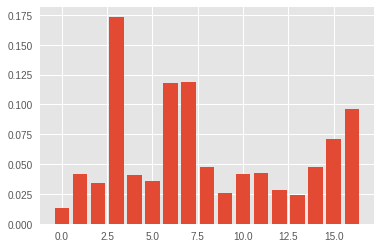

In [143]:
# bar graph of feature importance
import matplotlib.pyplot as plt
plt.bar(range(len(rf_upsample.feature_importances_)),rf_upsample.feature_importances_)

In [144]:
#prediction 
rf_upsample.score(X_test , rf_upsample.predict(X_test))

1.0

In [145]:
#training score
rf_upsample.score(X_train , rf_upsample.predict(X_train))

1.0

In [146]:
#classification report 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf_upsample.predict(X_test)))

             precision    recall  f1-score   support

          0       0.62      0.21      0.31       312
          1       0.99      1.00      1.00     34115

avg / total       0.99      0.99      0.99     34427



In [147]:
#confusion matrix
print(confusion_matrix(y_test,  rf_upsample.predict(X_test)))

[[   64   248]
 [   39 34076]]


# One-hot encoding of Data

This section one-hot encodes data and processes the filled date and the location. The data is then stored in a file called 'data_merged.csv' which merges all the columns along with the one-hot encoding.

In [0]:
data3 = data.copy()

In [0]:
data3.drop(['Permit Number', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix','Record ID'], axis = 1, inplace = True)

In [14]:
j=0

permit_type_onehot = pd.get_dummies(data3['Permit Type'],dummy_na= True)
(a,b) = np.shape(permit_type_onehot)
permit_type_onehot.columns = [i +j for i in range(b)]
j = j +b

existing_use_onehot  =  pd.get_dummies(data3['Existing Use'],dummy_na= True)
(a,b) = np.shape(existing_use_onehot)
existing_use_onehot.columns = [i+j for i in range(b)]
j = j+b


proposed_use_onehot  =  pd.get_dummies(data3['Proposed Use'],dummy_na= True)
(a,b) = np.shape(proposed_use_onehot)
proposed_use_onehot.columns = [i+j for i in range(b)]
j = j+b


supervisor_district_onehot  =  pd.get_dummies(data3['Supervisor District'],dummy_na= True)
(a,b) = np.shape(supervisor_district_onehot)
supervisor_district_onehot.columns = [i+j for i in range(b)]
j = j+b

neighborhood_onehot  =  pd.get_dummies(data3['Neighborhoods - Analysis Boundaries'],dummy_na= True)
(a,b) = np.shape(neighborhood_onehot)
neighborhood_onehot.columns = [i+j for i in range(b)]
j = j+b

zipcode_onehot  =  pd.get_dummies(data3['Zipcode'],dummy_na= True)
(a,b) = np.shape(zipcode_onehot)
zipcode_onehot.columns = [i+j for i in range(b)]
j = j+b

data_merged = data3.drop(['Permit Type', 'Existing Use',  'Proposed Use', 'Supervisor District',
                          'Neighborhoods - Analysis Boundaries', 'Zipcode'], axis = 1)

data_merged = data_merged.join(permit_type_onehot)
data_merged = data_merged.join(existing_use_onehot)
data_merged = data_merged.join(proposed_use_onehot)
data_merged = data_merged.join(supervisor_district_onehot)
data_merged = data_merged.join(neighborhood_onehot)
data_merged = data_merged.join(zipcode_onehot)



print(data_merged.head())



  Current Status  Filed Date  Number of Existing Stories  \
0        expired  05/06/2015                         6.0   
1         issued  04/19/2016                         7.0   
2       complete  11/07/2016                         2.0   
3         issued  11/28/2016                         3.0   
4         issued  06/14/2017                         5.0   

   Number of Proposed Stories  Estimated Cost  Existing Units  Proposed Units  \
0                         NaN        0.000007           143.0             NaN   
1                         NaN        0.000000             NaN             NaN   
2                         2.0        0.000004             1.0             1.0   
3                         NaN        0.000186             NaN             NaN   
4                         5.0        0.000007           326.0           326.0   

                                    Location  0  1 ...   269  270  271  272  \
0  (37.785719256680785, -122.40852313194863)  0  0 ...     0    0    0   

In [15]:
data4=data.copy()
combined= data4['Location'].str.strip('()').str.split(', ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'})
data4['Latitude']= combined['Latitude']
data4['Longitude']= combined['Longitude']
data4['Latitude'] = data4['Latitude'].apply(pd.to_numeric, errors='coerce')
data4['Longitude'] = data4['Longitude'].apply(pd.to_numeric, errors='coerce')
data4['Longitude']=(data4['Longitude']- data4['Longitude'].min())/( data4['Longitude'].max()- data4['Longitude'].min())
data4['Latitude']=(data4['Latitude']- data4['Latitude'].min())/( data4['Latitude'].max()- data4['Latitude'].min())
data_merged['Latitude'] = data4['Latitude']
data_merged['Longitude'] = data4['Longitude']
print(data_merged.columns)

Index([            'Current Status',                 'Filed Date',
       'Number of Existing Stories', 'Number of Proposed Stories',
                   'Estimated Cost',             'Existing Units',
                   'Proposed Units',                   'Location',
                                  0,                            1,
       ...
                                271,                          272,
                                273,                          274,
                                275,                          276,
                                277,                          278,
                         'Latitude',                  'Longitude'],
      dtype='object', length=289)


In [0]:
from datetime import datetime

year_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).year
data_merged['Filed_year'] = data_merged['Filed Date'].map(year_1)


month_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).month
data_merged['Filed_month'] = data_merged['Filed Date'].map(month_1)


day_1 = lambda x: datetime.strptime(x, "%m/%d/%Y" ).day
data_merged['Filed_day'] = data_merged['Filed Date'].map(day_1)

data_merged.drop(['Filed Date', 'Location'], axis =1, inplace = True)


In [17]:
data_merged.drop(['Current Status'], axis =1, inplace = True)
print(data_merged.columns)

Index(['Number of Existing Stories', 'Number of Proposed Stories',
                   'Estimated Cost',             'Existing Units',
                   'Proposed Units',                            0,
                                  1,                            2,
                                  3,                            4,
       ...
                                274,                          275,
                                276,                          277,
                                278,                   'Latitude',
                        'Longitude',                 'Filed_year',
                      'Filed_month',                  'Filed_day'],
      dtype='object', length=289)


In [0]:
data_merged.to_csv(path +'merged_data.csv')

In [18]:
data_merged.shape

(172133, 289)

#Random Forest with new dataset

In [0]:
#importing new data
data5 = pd.read_csv(path +'merged_data.csv')

In [228]:
data5.head()

,Unnamed: 0,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,0,1,2,3,...,274,275,276,277,278,Latitude,Longitude,Filed_year,Filed_month,Filed_day
0,0,6.0,NaN,0.000007,143.0,NaN,0,0,0,1,...,0,0,0,0,0,0.673289,0.705894,2015,5,6
1,1,7.0,NaN,0.000000,NaN,NaN,0,0,0,1,...,0,0,0,0,0,0.687359,0.691359,2016,4,19
2,2,2.0,2.0,0.000004,1.0,1.0,0,0,0,0,...,0,0,0,0,0,0.762188,0.657296,2016,11,7
3,3,3.0,NaN,0.000186,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0.651006,0.699100,2016,11,28
4,4,5.0,5.0,0.000007,326.0,326.0,0,0,0,0,...,0,0,0,0,0,0.443251,0.821820,2017,6,14


In [0]:
#mean and mode impute
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer_mode = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

In [0]:

data5= data5.drop("Unnamed: 0", axis=1)

In [0]:
imputer_mean.fit(data5)
X_new= imputer_mean.transform(data5)

In [0]:
X_new= pd.DataFrame(X_new ,columns= data5.columns)

In [0]:
data6 = pd.concat([X_new , y], axis=1)

In [234]:
data6.head()

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Existing Units,Proposed Units,0,1,2,3,4,...,275,276,277,278,Latitude,Longitude,Filed_year,Filed_month,Filed_day,Output
0,6.0,5.790699,0.000007,143.00000,16.516522,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.673289,0.705894,2015.0,5.0,6.0,1
1,7.0,5.790699,0.000000,15.75769,16.516522,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.687359,0.691359,2016.0,4.0,19.0,1
2,2.0,2.000000,0.000004,1.00000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.762188,0.657296,2016.0,11.0,7.0,1
3,3.0,5.790699,0.000186,15.75769,16.516522,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.651006,0.699100,2016.0,11.0,28.0,1
4,5.0,5.000000,0.000007,326.00000,326.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.443251,0.821820,2017.0,6.0,14.0,1


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify = y, random_state = 46, test_size = 0.2)

In [0]:
data_new2= pd.concat([X_train , y_train], axis=1)

In [237]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data_new2[data_new.Output==1]
df_minority = data_new2[data_new.Output==0]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= 136456,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Output.value_counts()

1    136456
0    136456
Name: Output, dtype: int64

In [0]:
from sklearn.ensemble import RandomForestClassifier
y_train_new = df_upsampled['Output']
X_train_new = df_upsampled.drop(['Output'],axis = 1)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, stratify = y2, random_state = 46, test_size = 0.2)
rf_new = RandomForestClassifier()

In [239]:
rf_new.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [240]:
rf_new.feature_importances_

array([6.08180247e-02, 3.50355940e-02, 1.11549182e-01, 3.43096081e-02,
       3.30545291e-02, 2.41998155e-04, 7.08790577e-04, 9.11196124e-03,
       8.53345563e-03, 1.02197242e-04, 8.40547035e-04, 2.66969813e-03,
       3.53396732e-02, 0.00000000e+00, 3.51232672e-03, 3.18445328e-03,
       1.49177705e-04, 9.88947508e-06, 3.46509669e-06, 0.00000000e+00,
       2.07487894e-05, 2.49010133e-04, 6.52719385e-03, 2.88353990e-04,
       3.02988023e-04, 4.68407951e-04, 7.32224948e-05, 0.00000000e+00,
       0.00000000e+00, 1.37795531e-04, 5.27275496e-06, 0.00000000e+00,
       1.12552061e-05, 3.80159456e-04, 5.74004197e-04, 2.87887644e-05,
       0.00000000e+00, 0.00000000e+00, 1.71021144e-05, 6.94152249e-06,
       1.24369092e-06, 7.26010380e-06, 0.00000000e+00, 1.37314014e-04,
       2.67884753e-05, 1.84474019e-06, 3.37034295e-04, 2.59206914e-03,
       7.28391776e-06, 1.05123001e-04, 1.97319526e-04, 5.63912556e-05,
       0.00000000e+00, 2.57114420e-04, 4.84881180e-04, 3.69567591e-06,
      

<Container object of 289 artists>

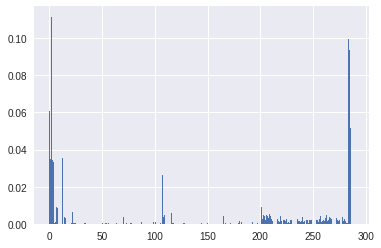

In [241]:
import matplotlib.pyplot as plt
plt.bar(range(len(rf_new.feature_importances_)), rf_new.feature_importances_)

In [0]:
arr= np.where(rf_new.feature_importances_>0.05)
#X_train_new.columns[2]

In [243]:
imp_features = X_train_new.columns[arr]
imp_features

Index(['Number of Existing Stories', 'Estimated Cost', 'Latitude', 'Longitude',
       'Filed_year', 'Filed_month', 'Filed_day'],
      dtype='object')

In [244]:
rf_new.score(X_train , y_train)

0.9996078602239554

In [245]:
rf_new.score(X_test , y_test)

0.991285909315363

In [246]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,rf_new.predict(X_test)))

             precision    recall  f1-score   support

          0       0.55      0.21      0.31       312
          1       0.99      1.00      1.00     34115

avg / total       0.99      0.99      0.99     34427



In [247]:
print(confusion_matrix(y_test, rf_new.predict(X_test)))

[[   67   245]
 [   55 34060]]


In [0]:
import pickle

In [0]:
pickle.dump(rf_new, open(path + "model.sav", 'wb'))

# Hyperparamter Tuning 

In [0]:
#Generate a graph that looks at the variation of Precision, Recall & F1-Score with the n_estimators HyperParameter
from sklearn.metrics import f1_score, precision_score, recall_score

f1_score_train = []
precision_train = []
recall_train = []

f1_score_test = []
precision_test = []
recall_test = []
n_estimators = [5,10,50,100,150,200]
for hp in n_estimators:
  rf_model_tune = RandomForestClassifier(n_estimators = hp)
  rf_model_tune.fit(X_train_new, y_train_new)
  
  f1_score_train.append(f1_score(y_train_new,rf_model_tune.predict(X_train_new)))
  precision_train.append(precision_score(y_train_new,rf_model_tune.predict(X_train_new)))
  recall_train.append(recall_score(y_train_new,rf_model_tune.predict(X_train_new)))
  
  f1_score_test.append(f1_score(y_test,rf_model_tune.predict(X_test)))
  precision_test.append(precision_score(y_test,rf_model_tune.predict(X_test)))
  recall_test.append(recall_score(y_test,rf_model_tune.predict(X_test)))

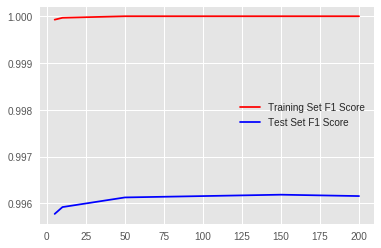

In [170]:
#Visualize the evaluation metrics
plt.style.use('ggplot')
plt.plot(n_estimators,f1_score_train, color = 'red', label = "Training Set F1 Score")
plt.plot(n_estimators,f1_score_test, color = 'blue', label = "Test Set F1 Score")
plt.legend()